# Autoencoders

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist

import matplotlib.pyplot as plt
import numpy as np

In [2]:
(x_train, _), (x_test, _) = mnist.load_data()
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

60000 train samples
10000 test samples


In [3]:
input_dim = 784

x_train = x_train.reshape(60000, input_dim)
x_test = x_test.reshape(10000, input_dim)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [4]:
latent_dim = 32  

Build Encoder, Decoder and Autoencoder models, using the Keras Functional API

In [5]:
def build_encoder():
    input_img = keras.Input(shape=(input_dim,))
    encoding_layer1 = layers.Dense(128, activation='relu')(input_img)
    encoding_layer2 = layers.Dense(64, activation='relu')(encoding_layer1)
    encoded = layers.Dense(latent_dim, activation='relu')(encoding_layer2)
    return keras.Model(input_img, encoded)

def build_decoder():
    decoder_input = keras.Input(shape=(latent_dim,))
    decoding_layer1 = layers.Dense(64, activation='relu')(decoder_input)
    decoding_layer2 = layers.Dense(128, activation='relu')(decoding_layer1)
    decoded = layers.Dense(input_dim, activation='sigmoid')(decoding_layer2)
    return keras.Model(decoder_input, decoded)


In [6]:
encoder = build_encoder()
encoder.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
Total params: 110,816
Trainable params: 110,816
Non-trainable params: 0
_________________________________________________________________


In [7]:
decoder = build_decoder()
decoder.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 32)]              0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_4 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_5 (Dense)              (None, 784)               101136    
Total params: 111,568
Trainable params: 111,568
Non-trainable params: 0
_________________________________________________________________


In [8]:
input_images = keras.Input(shape=(input_dim,))
encoded_repr = encoder(input_images)
reconstructed_output = decoder(encoded_repr)

autoencoder = keras.Model(input_images, reconstructed_output)

In [9]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [10]:
autoencoder.fit(x_train, x_train,
                epochs=10,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/10
469/469 [==============================] - 2s 3ms/step - loss: 0.2015 - val_loss: 0.1421
Epoch 2/10
469/469 [==============================] - 1s 3ms/step - loss: 0.1323 - val_loss: 0.1217
Epoch 3/10
469/469 [==============================] - 1s 3ms/step - loss: 0.1179 - val_loss: 0.1120
Epoch 4/10
469/469 [==============================] - 1s 3ms/step - loss: 0.1099 - val_loss: 0.1053
Epoch 5/10
469/469 [==============================] - 1s 3ms/step - loss: 0.1052 - val_loss: 0.1019
Epoch 6/10
469/469 [==============================] - 1s 3ms/step - loss: 0.1021 - val_loss: 0.0993
Epoch 7/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0996 - val_loss: 0.0976
Epoch 8/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0977 - val_loss: 0.0955
Epoch 9/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0961 - val_loss: 0.0943
Epoch 10/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0948 - val_loss: 0.0934

Results visualization

In [11]:
# Encode and decode some digits
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

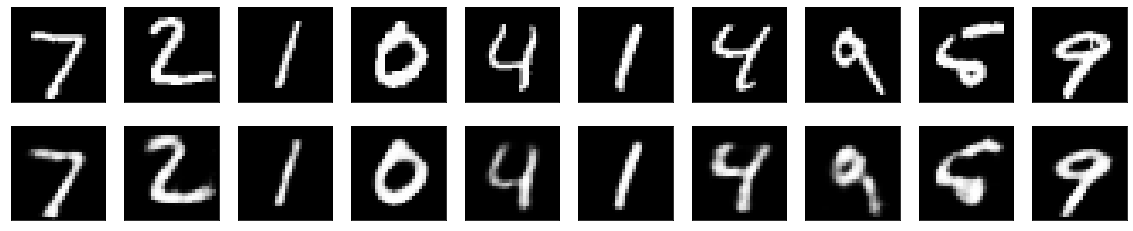

In [12]:
n = 10  # number of digits to display
plt.figure(figsize=(20, 4))
for i in range(n):
    
    # original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# Denoising 

In [13]:
# Add noise to images
noise_factor = 0.4
x_train_noise  = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noise = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train_noise = np.clip(x_train_noise, 0., 1.)
x_test_noise = np.clip(x_test_noise, 0., 1.)

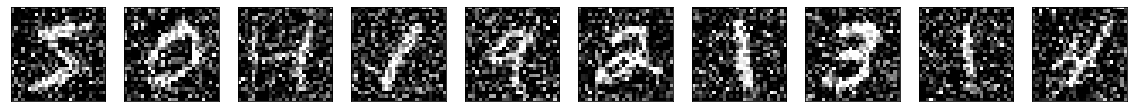

In [14]:
# Noise images visualization
n = 10  # number of digits to display
plt.figure(figsize=(20, 2))
for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    plt.imshow(x_train_noise[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

In [15]:
# Build the Model
input_layer = keras.Input(shape=(input_dim,))
encoding_layer1 = layers.Dense(128, activation='relu')(input_layer)
encoding_layer2 = layers.Dense(64, activation='relu')(encoding_layer1)
encoding_layer3 = layers.Dense(latent_dim, activation='relu')(encoding_layer2)

decoding_layer1 = layers.Dense(64, activation='relu')(encoding_layer2)
decoding_layer2 = layers.Dense(128, activation='relu')(decoding_layer1)
output_images = layers.Dense(input_dim, activation='sigmoid')(decoding_layer2)

autoencoder = keras.Model(input_layer, output_images)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [16]:
autoencoder.fit(x_train_noise, x_train, epochs=10, batch_size=128, shuffle=True, validation_split = 0.15)

Epoch 1/10
399/399 [==============================] - 1s 3ms/step - loss: 0.2232 - val_loss: 0.1654
Epoch 2/10
399/399 [==============================] - 1s 3ms/step - loss: 0.1521 - val_loss: 0.1431
Epoch 3/10
399/399 [==============================] - 1s 3ms/step - loss: 0.1374 - val_loss: 0.1337
Epoch 4/10
399/399 [==============================] - 1s 3ms/step - loss: 0.1299 - val_loss: 0.1275
Epoch 5/10
399/399 [==============================] - 1s 3ms/step - loss: 0.1250 - val_loss: 0.1237
Epoch 6/10
399/399 [==============================] - 1s 3ms/step - loss: 0.1214 - val_loss: 0.1204
Epoch 7/10
399/399 [==============================] - 1s 3ms/step - loss: 0.1186 - val_loss: 0.1184
Epoch 8/10
399/399 [==============================] - 1s 3ms/step - loss: 0.1163 - val_loss: 0.1164
Epoch 9/10
399/399 [==============================] - 1s 3ms/step - loss: 0.1142 - val_loss: 0.1145
Epoch 10/10
399/399 [==============================] - 1s 3ms/step - loss: 0.1125 - val_loss: 0.1142

In [17]:
output_images = autoencoder.predict(x_test_noise)

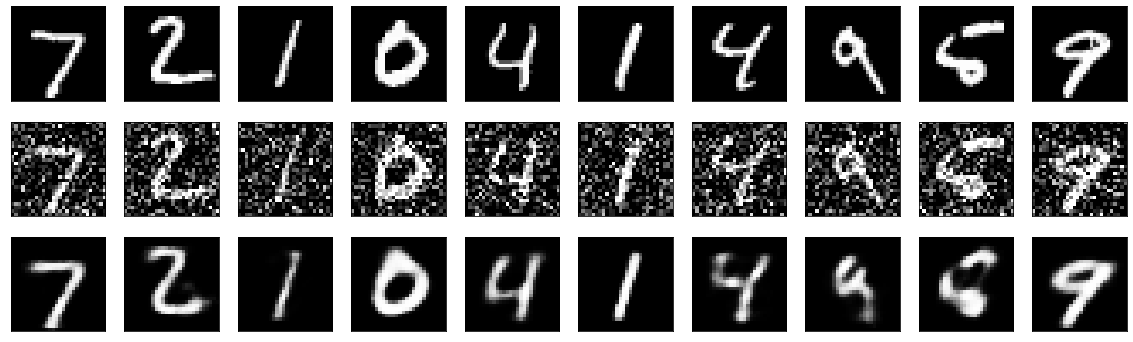

In [18]:
n = 10  # number of digits to display
plt.figure(figsize=(20, 6))
for i in range(n):
    
    # original
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # noised
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(x_test_noise[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # denoised
    ax = plt.subplot(3, n, i + 1 + n * 2)
    plt.imshow(output_images[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()